## Generalized Inverse

Moore-Penrose generalized inverse

$X^{-} = VD^{-}U^T$  
$D^{-} = Diag(d_1^{-},...,d_p^{-}), d_i^{-} = \frac{1}{d_i}$  
if $d_i$ $\neq$ 0 and $d_i^{-}=0$ if $d_i=0$

In [4]:
X = matrix(c(2,4,1,2),nrow=2)
Y = svd(X)

In [6]:
Dinv = diag(c(1/Y$d[1],0))
Xinv = Y$v%*%Dinv%*%t(Y$u)

In [7]:
Xinv

0.08,0.16
0.04,0.08


In [9]:
library(MASS)
Xinv = ginv(X)

In [10]:
Xinv

0.08,0.16
0.04,0.08


## Additive models

#### Splines

$Y_i = \phi(X_i) + \epsilon_i$

$\phi(X_i) = \beta_0 + \beta_1X_i + \beta_2X_i^2$

## Examples

In [25]:
library("splines")
library("ISLR")
attach(Wage)

The following objects are masked from Wage (pos = 3):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year


The following objects are masked from Wage (pos = 4):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year


The following objects are masked from Wage (pos = 5):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year




In [26]:
agelims = range(age)
age.grid = seq(agelims[1],agelims[2])

### Cubic Spline with 3 Knots (cutpoints)
### 3 cutpoints at ages 25,50,60

In [30]:
fit = lm(wage~bs(age,knots=c(25,50,60)),data=Wage)
summary(fit)


Call:
lm(formula = wage ~ bs(age, knots = c(25, 50, 60)), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.379 -24.508  -4.731  15.529 202.872 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       61.294      9.333   6.567 6.02e-11 ***
bs(age, knots = c(25, 50, 60))1    1.740     11.637   0.150   0.8811    
bs(age, knots = c(25, 50, 60))2   63.689      9.688   6.574 5.76e-11 ***
bs(age, knots = c(25, 50, 60))3   54.533     10.664   5.114 3.36e-07 ***
bs(age, knots = c(25, 50, 60))4   61.134     10.319   5.924 3.50e-09 ***
bs(age, knots = c(25, 50, 60))5   36.151     16.381   2.207   0.0274 *  
bs(age, knots = c(25, 50, 60))6   23.001     19.498   1.180   0.2382    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.91 on 2993 degrees of freedom
Multiple R-squared:  0.08727,	Adjusted R-squared:  0.08544 
F-statistic:  47.7 on 6 and 2993 DF,  p-value: < 

## Plotting the Regression Line to the scatterplot

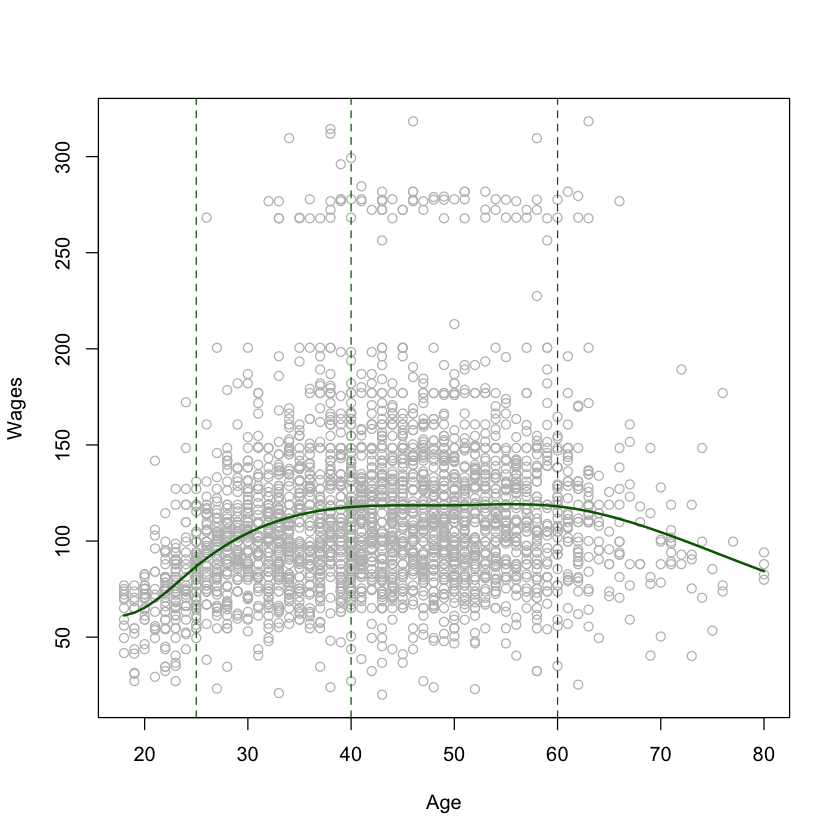

In [33]:
plot(age,wage,col="grey",xlab="Age",ylab="Wages")
points(age.grid,predict(fit,newdata=list(age=age.grid)),col="darkgreen",lwd=2,type="l")
abline(v=c(25,40,60),lty=2,col="darkgreen")

## Fitting smoothing splines using smooth.splines(X,Y,df=...)

In [35]:
fit1 = smooth.spline(age,wage,df=16)

### Plotting both cubic and Smoothing Splines

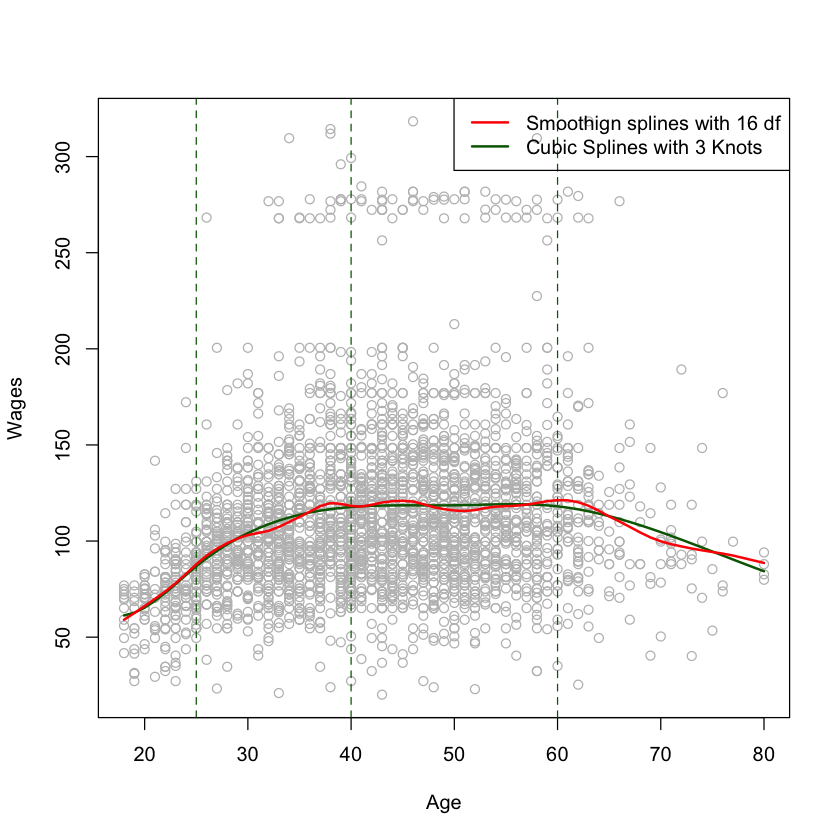

In [38]:
plot(age,wage,col="grey",xlab="Age",ylab="Wages")
points(age.grid,predict(fit,newdata=list(age=age.grid)),col="darkgreen",lwd=2,type="l")
abline(v=c(25,40,60),lty=2,col="darkgreen")
lines(fit1,col='red',lwd=2)
legend("topright",c("Smoothign splines with 16 df","Cubic Splines with 3 Knots"),col=c("red","darkgreen"),lwd=2)

## Autoselect the degree of freedom based on cross-validation

In [39]:
fit2 = smooth.spline(age,wage)

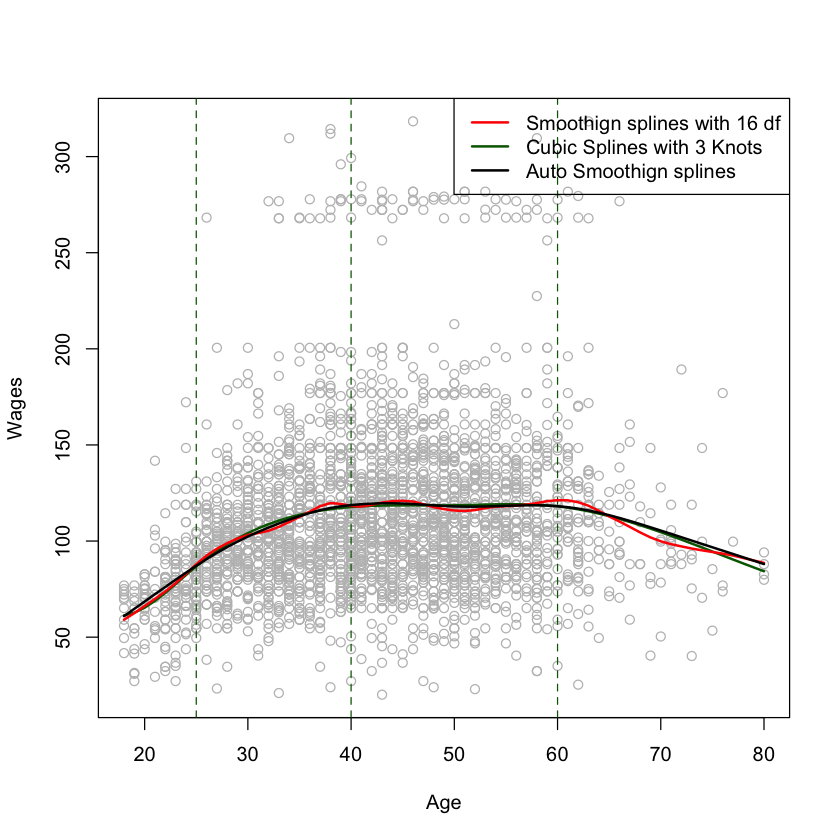

In [41]:
plot(age,wage,col="grey",xlab="Age",ylab="Wages")
points(age.grid,predict(fit,newdata=list(age=age.grid)),col="darkgreen",lwd=2,type="l")
abline(v=c(25,40,60),lty=2,col="darkgreen")
lines(fit1,col='red',lwd=2)
lines(fit2,col='black',lwd=2)
legend("topright",c("Smoothign splines with 16 df","Cubic Splines with 3 Knots","Auto Smoothign splines"),col=c("red","darkgreen","black"),lwd=2)
